In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as kt
import tensorflow as tf
from keras.datasets import fashion_mnist

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPooling2D, LSTM, GRU, Convolution1D, MaxPooling1D, Conv1D
from keras import regularizers
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.callbacks import EarlyStopping
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [11]:
(x_train_or, y_train), (x_test_or, y_test) = fashion_mnist.load_data()

In [12]:
x_train = (x_train_or/255. - 0.5) * 2.
x_test = (x_test_or/255. - 0.5) * 2.

In [13]:
av_x_train = x_train[0:101]
av_y_train = y_train[0:101]

In [22]:
# Creación del modelo
model = Sequential()

model.add(GRU(32, input_shape=x_train.shape[1:], return_sequences = True, activation="relu"))
model.add(MaxPooling1D(pool_size=2, strides=2))

model.add(GRU(64, return_sequences = True, activation="relu"))

model.add(LSTM(128, return_sequences = True, activation="relu"))

model.add(Conv1D(256, kernel_size = (3,), activation="relu", padding='same', kernel_regularizer=regularizers.L1L2(0.015, 0.4)))
model.add(MaxPooling1D(pool_size=2, strides=2))

model.add(Conv1D(512, kernel_size = (3,), activation="relu", padding='same', kernel_regularizer=regularizers.L1L2(0.015, 0.4)))

model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.3))


model.add(Dense(1))

# Parámetros del compilador
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt)

# mostramos el modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 28, 32)            5952      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 14, 32)           0         
 1D)                                                             
                                                                 
 gru_5 (GRU)                 (None, 14, 64)            18816     
                                                                 
 lstm_2 (LSTM)               (None, 14, 128)           98816     
                                                                 
 conv1d_4 (Conv1D)           (None, 14, 256)           98560     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 7, 256)           0         
 1D)                                                  

In [24]:
epochs = 500
batch_size = 300

# Callback de configuración del Early Stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

# Callback de configuración de la reudcción del Learning Rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=4, min_lr=0.00001)

# Entrenamos el modelo
history = model.fit(av_x_train, av_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split = 0.1, callbacks=[early_stop, reduce_lr])

Epoch 1/500
1/1 [==============================] - 0s 473ms/step - loss: nan - val_loss: nan - lr: 1.0000e-05
Epoch 2/500
1/1 [==============================] - 0s 336ms/step - loss: nan - val_loss: nan - lr: 1.0000e-05
Epoch 3/500
1/1 [==============================] - 0s 366ms/step - loss: nan - val_loss: nan - lr: 1.0000e-05
Epoch 4/500
1/1 [==============================] - 0s 321ms/step - loss: nan - val_loss: nan - lr: 1.0000e-05
Epoch 5/500
1/1 [==============================] - 0s 316ms/step - loss: nan - val_loss: nan - lr: 1.0000e-05
Epoch 6/500
1/1 [==============================] - 0s 314ms/step - loss: nan - val_loss: nan - lr: 1.0000e-05
Epoch 7/500
1/1 [==============================] - 0s 319ms/step - loss: nan - val_loss: nan - lr: 1.0000e-05
Epoch 8/500
1/1 [==============================] - 0s 337ms/step - loss: nan - val_loss: nan - lr: 1.0000e-05
Epoch 9/500
1/1 [==============================] - 0s 308ms/step - loss: nan - val_loss: nan - lr: 1.0000e-05
Epoch 10/5

KeyboardInterrupt: 

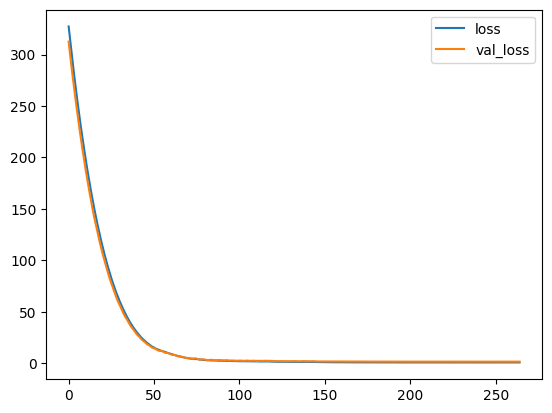

In [17]:
plt.figure
plt.plot(history.history['loss'][5:],label="loss")
plt.plot(history.history['val_loss'][5:],label="val_loss")
plt.legend()

In [18]:
score = model.evaluate(x_test,y_test)
score

313/313 [==============================] - 13s 41ms/step - loss: 1.5038


1.503841757774353

In [19]:
# Predecimos en test
y_hat = model.predict(x_test)
# mostramos el error
np.mean(abs(y_hat[:,0]-y_test))

313/313 [==============================] - 14s 43ms/step


1.3699832

In [45]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [46]:
# descargamos separados en entrenamiento y tes
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# tamaño de los datos
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


9
(1000, 28, 28, 1)
(1000,)


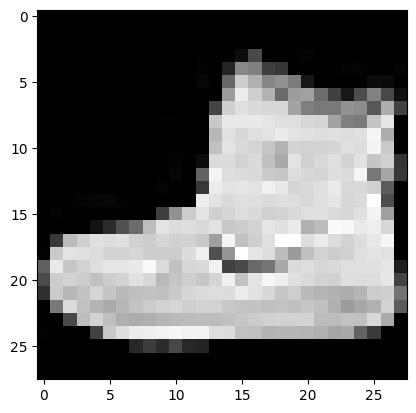

In [47]:
#plot the first image in the dataset
plt.imshow(X_train[0,:,:],cmap='gray')

# Mostramos la etiqueta de la imagen
print(y_train[0])


X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)


X_train = X_train[0:1000,:,:,:]
X_test = X_test[0:1000,:,:,:]
y_train = y_train[0:1000]
y_test = y_test[0:1000]

print(X_train.shape)
print(y_train.shape)

In [48]:
# me guardo los y_train antes de hacer el one-hot
y_train_old = y_train

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)


y_train[0,:]

# Lo que antes era 
print(y_train_old[0,])
# Ahora es
print(y_train[0,:])

(1000, 10)
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [49]:
# Usamos un modelo secuencial
model = Sequential()

# ponemos dos capas de convolución, una flatten y una densa
model.add(Conv2D(40, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='valid'))
#model.add(Dropout(0.5))
model.add(Conv2D(30, kernel_size=3, activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(2))
#model.add(Conv2D(20, kernel_size=3, activation='relu'))
#model.add(Conv2D(32, kernel_size=7, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))



model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 40)        400       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 30)        10830     
                                                                 
 flatten_4 (Flatten)         (None, 17280)             0         
                                                                 
 dense_7 (Dense)             (None, 10)                172810    
                                                                 
Total params: 184,040
Trainable params: 184,040
Non-trainable params: 0
_________________________________________________________________


In [50]:
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy'],)

In [51]:
hist = model.fit(X_train, y_train, validation_split = 0.1, epochs=250)

Epoch 1/250
29/29 [==============================] - 1s 17ms/step - loss: 15.7017 - categorical_accuracy: 0.5200 - val_loss: 0.8379 - val_categorical_accuracy: 0.7500
Epoch 2/250
29/29 [==============================] - 0s 6ms/step - loss: 0.4925 - categorical_accuracy: 0.8333 - val_loss: 0.7334 - val_categorical_accuracy: 0.8000
Epoch 3/250
29/29 [==============================] - 0s 6ms/step - loss: 0.2343 - categorical_accuracy: 0.9200 - val_loss: 0.7939 - val_categorical_accuracy: 0.7800
Epoch 4/250
29/29 [==============================] - 0s 5ms/step - loss: 0.1620 - categorical_accuracy: 0.9444 - val_loss: 0.7628 - val_categorical_accuracy: 0.8100
Epoch 5/250
29/29 [==============================] - 0s 5ms/step - loss: 0.0995 - categorical_accuracy: 0.9722 - val_loss: 0.9949 - val_categorical_accuracy: 0.8100
Epoch 6/250
29/29 [==============================] - 0s 5ms/step - loss: 0.0687 - categorical_accuracy: 0.9811 - val_loss: 0.9416 - val_categorical_accuracy: 0.8200
Epoch 7/

In [52]:
score = model.evaluate(X_test,y_test)
score


32/32 [==============================] - 0s 7ms/step - loss: 2.6369 - categorical_accuracy: 0.7700


[2.6368584632873535, 0.7699999809265137]

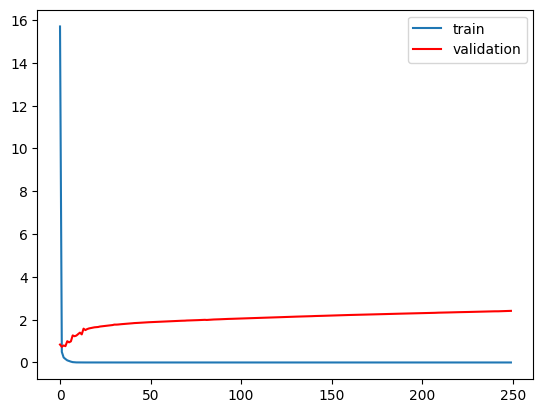

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],'r',label='validation')
plt.legend()

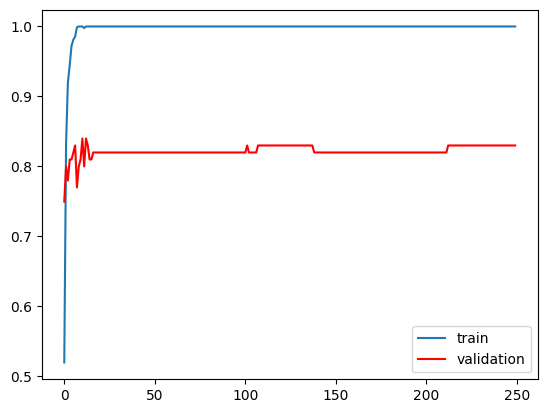

In [54]:
# Evolucion en accuracy

import matplotlib.pyplot as plt
plt.figure
plt.plot(hist.history['categorical_accuracy'],label='train')
plt.plot(hist.history['val_categorical_accuracy'],'r',label='validation')
plt.legend()


In [55]:
# Predecimos en test
preds_test = model.predict(X_test)

32/32 [==============================] - 0s 4ms/step


['p(y=0|x) = 0.0000', 'p(y=1|x) = 0.0000', 'p(y=2|x) = 1.0000', 'p(y=3|x) = 0.0000', 'p(y=4|x) = 0.0000', 'p(y=5|x) = 0.0000', 'p(y=6|x) = 0.0000', 'p(y=7|x) = 0.0000', 'p(y=8|x) = 0.0000', 'p(y=9|x) = 0.0000']


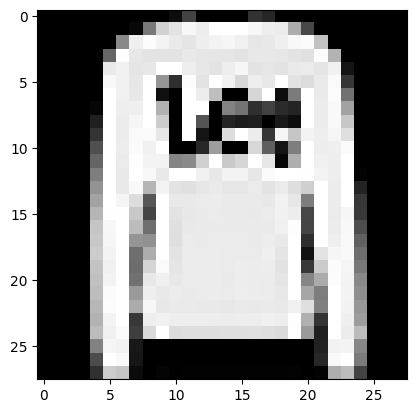

In [56]:
# Elegimos una imagen de test
idx_mostrar = 1
# Mostramos la imagen
plt.imshow(np.squeeze(X_test[idx_mostrar,:,:,]),cmap="gray")
# Mostramos las probabilidades que da el modelo a cada clase
print(["p(y=%d|x) = %.4f"%(i,p) for i,p in enumerate(preds_test[idx_mostrar])])

In [57]:
y_train[7]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)